# 公式图

- 凸函数

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# 定义均方误差函数
def mse(x, y):
    return x**2 + y**2

# 生成数据
x = np.linspace(-10, 10, 100)
y = np.linspace(-10, 10, 100)
X, Y = np.meshgrid(x, y)
Z = mse(X, Y)

# 增加数据点的数量
x_smooth = np.linspace(-10, 10, 500)
y_smooth = np.linspace(-10, 10, 500)
X_smooth, Y_smooth = np.meshgrid(x_smooth, y_smooth)
Z_smooth = mse(X_smooth, Y_smooth)

# 绘制三维图形
fig = plt.figure(figsize=(12, 12))  # 设置图形大小为 8x6 英寸
ax = fig.add_subplot(111, projection='3d')

# 将均方误差函数的值映射到颜色
colors = Z_smooth / Z_smooth.max()  # 将值归一化到[0, 1]
cmap = plt.cm.get_cmap('coolwarm')  # 选择颜色映射

# 绘制散点图
sc = ax.scatter(X_smooth, Y_smooth, Z_smooth, c=colors, cmap=cmap)

# 设置图形标题和轴标签
ax.set_title('Mean Squared Error Function')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('MSE', rotation=90)  # 设置 z 轴标签，并旋转 90 度

# 添加颜色条
# cbar = plt.colorbar(sc, ax=ax, shrink=0.5, aspect=5)
# cbar.set_label('MSE')

# 显示图形
plt.show()


- 非凸函数

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# 定义非凸函数
def non_convex_function(x, y):
    return x**2 - y**2

# 生成更密集的数据
x = np.linspace(-3, 3, 400)
y = np.linspace(-3, 3, 400)
X, Y = np.meshgrid(x, y)
Z = non_convex_function(X, Y)

# 绘制三维图形
fig = plt.figure(figsize=(15, 15))  # 设置图形大小为 8x6 英寸
ax = fig.add_subplot(111, projection='3d')

# 绘制曲面图
surf = ax.plot_surface(X, Y, Z, cmap='jet', linewidth=0, antialiased=False, alpha=0.7)


# 设置图形标题和轴标签
# ax.set_title('Smooth Non-Convex Function with Multiple Local Minima')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('z')

# 添加颜色条
# fig.colorbar(surf, shrink=0.5, aspect=5)

# 显示图形
plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Redefine the function with a finer meshgrid for smoother appearance
x_smooth = np.linspace(-3, 3, 400)
y_smooth = np.linspace(-3, 3, 400)
x_smooth, y_smooth = np.meshgrid(x_smooth, y_smooth)

# Recalculate z for the smoother grid
z_smooth = np.sin(x_smooth * 2) * np.cos(y_smooth * 2) + np.sin(x_smooth * 3) + np.cos(y_smooth * 3)
# z_smooth = np.sin(x) ** 2 + np.cos(y) ** 2

# Plotting with the smoother data
fig = plt.figure(figsize=(13, 13))
ax = fig.add_subplot(111, projection='3d')

# Create a contourf plot in 3D with the smoother data
# surf = ax.contourf(x_smooth, y_smooth, z_smooth, 100, cmap='coolwarm', extend='both')
# fig.colorbar(surf, shrink=0.5, aspect=5, label='Value')
surf = ax.plot_surface(x_smooth, y_smooth, z_smooth, 
                    #    cmap='coolwarm',
                       cmap='coolwarm',
                       alpha=0.7,
                        )

# ax.set_title('Smooth 3D Heatmap of Non-Convex Function')
ax.set_xlabel('W')
ax.set_ylabel('b')
ax.set_zlabel('J(W, b)')

plt.show()


In [ ]:
# Redefine the function with a clearer color map for larger (red) and smaller (blue) values
def f(x, y):
    return np.sin(x) ** 2 + np.cos(y) ** 2

def grad_f(x, y):
    df_dx = 2 * np.sin(x) * np.cos(x)
    df_dy = -2 * np.sin(y) * np.cos(y)
    return np.array([df_dx, df_dy])

# Redefine gradient descent to use this simpler function
def gradient_descent(starting_point, learning_rate, n_iterations):
    points = [starting_point]
    for _ in range(n_iterations):
        gradient = grad_f(*points[-1])
        new_point = points[-1] - learning_rate * gradient
        points.append(new_point)
    return np.array(points)

# Parameters for the new function
starting_point = np.array([1.0, 1.0])
learning_rate = 0.1
n_iterations = 15

# Perform Gradient Descent
path = gradient_descent(starting_point, learning_rate, n_iterations)

# Plotting with a simpler function and gradient
x = np.linspace(-3, 3, 400)
y = np.linspace(-3, 3, 400)
x, y = np.meshgrid(x, y)
z = f(x, y)

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(x, y, z, cmap='coolwarm', alpha=0.6)

# Add arrows to indicate updates
for i in range(len(path) - 1):
    ax.quiver(path[i, 0], path[i, 1], f(*path[i]),
              path[i+1, 0] - path[i, 0], path[i+1, 1] - path[i, 1], f(*path[i+1]) - f(*path[i]),
              color='k', arrow_length_ratio=0.05)

# ax.set_title('3D Gradient Descent Visualization with Update Arrows')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('f(X, Y)')

plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Define the function and its gradient
def f(x, y):
    return np.sin(0.5 * x ** 2 - 0.25 * y ** 2 + 3) * np.cos(2 * x + 1 - np.exp(y))

def grad_f(x, y):
    df_dx = 0.5 * x * np.cos(0.5 * x ** 2 - 0.25 * y ** 2 + 3) * np.cos(2 * x + 1 - np.exp(y)) - 2 * np.sin(2 * x + 1 - np.exp(y)) * np.sin(0.5 * x ** 2 - 0.25 * y ** 2 + 3)
    df_dy = -0.25 * y * np.cos(0.5 * x ** 2 - 0.25 * y ** 2 + 3) * np.cos(2 * x + 1 - np.exp(y)) + np.exp(y) * np.sin(2 * x + 1 - np.exp(y)) * np.sin(0.5 * x ** 2 - 0.25 * y ** 2 + 3)
    return np.array([df_dx, df_dy])

# Gradient Descent
def gradient_descent(starting_point, learning_rate, n_iterations):
    points = [starting_point]
    for _ in range(n_iterations):
        gradient = grad_f(*points[-1])
        new_point = points[-1] - learning_rate * gradient
        points.append(new_point)
    return np.array(points)

# Starting point and parameters
starting_point = np.array([0.5, -0.5])
learning_rate = 0.1
n_iterations = 10

# Perform Gradient Descent
path = gradient_descent(starting_point, learning_rate, n_iterations)

# Plotting
x = np.linspace(-2, 2, 400)
y = np.linspace(-2, 2, 400)
x, y = np.meshgrid(x, y)
z = f(x, y)

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(x, y, z, cmap='viridis', alpha=0.6)
ax.plot(path[:, 0], path[:, 1], f(path[:, 0], path[:, 1]), color='r', marker='o', markersize=5, linestyle='-', linewidth=2)
ax.set_title('3D Gradient Descent Visualization')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('f(X, Y)')

plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Redefine the function with a clearer color map for larger (red) and smaller (blue) values
def f(x, y):
    return np.sin(x * 2)  + np.cos(y * 2)  + np.sin(x * 3) + np.cos(y * 3)

def grad_f(x, y):
    df_dx = 2 * np.sin(x) * np.cos(x)
    df_dy = -2 * np.sin(y) * np.cos(y)
    return np.array([df_dx, df_dy])

# Redefine gradient descent to use this simpler function
def gradient_descent(starting_point, learning_rate, n_iterations):
    points = [starting_point]
    for _ in range(n_iterations):
        gradient = grad_f(*points[-1])
        new_point = points[-1] - learning_rate * gradient
        points.append(new_point)
    return np.array(points)

# Parameters for the new function
starting_point = np.array([1.0, 1.0])
learning_rate = 0.1
n_iterations = 15

# Perform Gradient Descent
# path = gradient_descent(starting_point, learning_rate, n_iterations)

# Plotting with a simpler function and gradient
x = np.linspace(-3, 3, 1000)
y = np.linspace(-3, 3, 1000)
x, y = np.meshgrid(x, y)
z = f(x, y)

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(x, y, z, 
                    #    cmap='coolwarm',
                       cmap='coolwarm',
                       alpha=0.7,
                        )

# Add arrows to indicate updates
# for i in range(len(path) - 1):
#     ax.quiver(path[i, 0], path[i, 1], f(*path[i]),
#               path[i+1, 0] - path[i, 0], path[i+1, 1] - path[i, 1], f(*path[i+1]) - f(*path[i]),
#               color='k', arrow_length_ratio=0.05)

# ax.set_title('3D Gradient Descent Visualization with Update Arrows')
ax.set_xlabel('W')
ax.set_ylabel('b')
ax.set_zlabel('J(W, b)')

plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Define the function to be optimized and its gradient
def func(w1, w2):
    return w1**2 + w2**2 + 10

def grad(w1, w2):
    return 2*w1, 2*w2

# Perform gradient descent
def gradient_descent(initial_w1, initial_w2, learning_rate, num_iterations):
    w1, w2 = initial_w1, initial_w2
    path = [(w1, w2)]
    for _ in range(num_iterations):
        dw1, dw2 = grad(w1, w2)
        w1, w2 = w1 - learning_rate * dw1, w2 - learning_rate * dw2
        path.append((w1, w2))
    return np.array(path)

# Parameters for gradient descent
initial_w1, initial_w2 = -3, 3  # Start at the top left corner
learning_rate = 0.1
num_iterations = 10

# Create a meshgrid for the (w1, w2) space
w1 = np.linspace(-3, 3, 400)
w2 = np.linspace(-3, 3, 400)
w1, w2 = np.meshgrid(w1, w2)
z = func(w1, w2)

# Plot the function and the path
fig = plt.figure(figsize=(13, 13))
ax = fig.add_subplot(111, projection='3d')
# Use the 'jet' colormap to mimic the color scheme in the user's image
surf = ax.plot_surface(w1, w2, z, rstride=5, cstride=5, alpha=0.7, cmap='jet')
# fig.colorbar(surf, shrink=0.5, aspect=5, label='J()')

# Plot the gradient descent path
# ax.scatter(path[:, 0], path[:, 1], func(path[:, 0], path[:, 1]), color='r', s=50)


ax.set_xlabel('W')
ax.set_ylabel('b')
ax.set_zlabel('J(W, b)')
# ax.set_title('MSE function')

plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Define the function to be optimized and its gradient
def func(w1, w2):
    return w1**2 + w2**2 + 10

def grad(w1, w2):
    return 2*w1, 2*w2

# Perform gradient descent
def gradient_descent(initial_w1, initial_w2, learning_rate, num_iterations):
    w1, w2 = initial_w1, initial_w2
    path = [(w1, w2)]
    for _ in range(num_iterations):
        dw1, dw2 = grad(w1, w2)
        w1, w2 = w1 - learning_rate * dw1, w2 - learning_rate * dw2
        path.append((w1, w2))
    return np.array(path)

# Parameters for gradient descent
initial_w1, initial_w2 = -3, 3  # Start at the top left corner
learning_rate = 0.1
num_iterations = 10

# Run gradient descent to get the path of descent
path = gradient_descent(initial_w1, initial_w2, learning_rate, num_iterations)

# Create a meshgrid for the (w1, w2) space
w1 = np.linspace(-4, 4, 400)
w2 = np.linspace(-4, 4, 400)
w1, w2 = np.meshgrid(w1, w2)
z = func(w1, w2)

# Plot the function and the path
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
# Use the 'jet' colormap to mimic the color scheme in the user's image
surf = ax.plot_surface(w1, w2, z, rstride=5, cstride=5, alpha=0.7, cmap='jet')
fig.colorbar(surf, shrink=0.5, aspect=5, label='J()')

# Plot the gradient descent path
ax.scatter(path[:, 0], path[:, 1], func(path[:, 0], path[:, 1]), color='r', s=50)

# Add arrows to show the gradient descent path
for i in range(1, len(path)):
    ax.quiver(path[i-1, 0], path[i-1, 1], func(*path[i-1]),
              path[i, 0] - path[i-1, 0], path[i, 1] - path[i-1, 1], func(*path[i]) - func(*path[i-1]),
              color='k', arrow_length_ratio=0.1, linewidth=2)

ax.set_xlabel('w1')
ax.set_ylabel('w2')
ax.set_zlabel('J(w1, w2)')
ax.set_title('Gradient Descent Optimization with Jet Colormap')

plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# 生成输入数据
x = np.linspace(-5, 5, 100)

# 计算 tanh 函数值
y = np.tanh(x)

# 绘制图像
plt.figure(figsize=(8, 6))
plt.plot(x, y, label='tanh', color='blue')
plt.title('Tanh Function')
plt.xlabel('x')
plt.ylabel('tanh(x)')
plt.grid(True)
plt.yticks(np.arange(-1, 1.1, 0.5))  # 设置 y 轴刻度间距为 0.5
plt.legend()
plt.show()


1.0 31 30


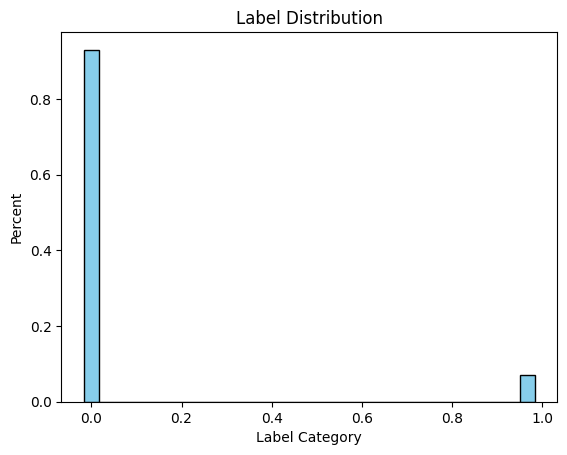

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# path = 'H:/LocalDisk/project/CuanDongBei/slice/seis/slice_data.datt'
# path = 'data/validation/seis/redb.datt'
path = 'data/train/0fault/redb.datt'
data = np.fromfile(path, dtype=np.single)

# 计算数据的直方图
counts, bins = np.histogram(data, bins=30)

# 计算频率
frequencies = counts / len(data)

print(bins[-1], len(bins), len(frequencies))
# 绘制频率柱状图
plt.bar(bins[:-1], frequencies, width=np.diff(bins), color='skyblue', edgecolor='black')

# 添加标题和标签
# plt.title('Frequency Histogram')
plt.title('Label Distribution')
plt.xlabel('Label Category')
plt.ylabel('Percent')

# 显示图形
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# path = 'H:/LocalDisk/project/CuanDongBei/slice/seis/slice_data.datt'
path = 'data/train/0seis/redb.datt'
# path = 'data/validation/seis/redb.datt'
# path = 'data/train/0fault/redb.datt'
# 生成一组随机数据作为示例
# data = np.random.randn(1000)
data = np.fromfile(path, dtype=np.single)

# 绘制直方图
plt.hist(data, bins=100, color='skyblue', edgecolor='black', 
        #  density=True, 
        #  stacked=True,
        #  cumulative=True
         )

# 添加标题和标签
plt.title('Distribution of Train Data')
plt.xlabel('Value')
plt.ylabel('Frequency')

# 显示图形
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# 创建数据
x = np.linspace(0, 2*np.pi, 100)
y1 = np.sin(x)
y2 = np.cos(x)

# 创建子图
fig, axs = plt.subplots(2, 2, figsize=(10, 5))

# 绘制第一个子图
axs[0,0].plot(x, y1)
axs[0,0].set_title('Sin Function')  # 设置子图标题
axs[0,0].set_xlabel('X')  # 设置X轴名称
axs[0,0].set_ylabel('Y')  # 设置Y轴名称

# 绘制第二个子图
axs[0,1].plot(x, y2)
axs[0,1].set_title('Cos Function')  # 设置子图标题
axs[0,1].set_xlabel('X')  # 设置X轴名称
axs[0,1].set_ylabel('Y')  # 设置Y轴名称

# 调整子图之间的间距
plt.tight_layout()

# 显示图形
plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from evaluate import Evaluate
evlt = Evaluate()


path1 = 'data/train/0seis/redb.datt'
path2 = 'data/validation/seis/redb.datt'
path3 = 'H:/LocalDisk/project/CuanDongBei/slice/seis/slice_data.datt'

data1 = np.fromfile(path1, dtype=np.single)
data2 = np.fromfile(path2, dtype=np.single)
data3 = np.fromfile(path3, dtype=np.single)

# 创建一个包含4幅子图的图表
fig, axs = plt.subplots(2, 3, figsize=(10, 8))

axs[0,0].set_ylabel('Scale')
axs[1,0].set_ylabel('Percent')

# # 绘制直方图并设置子图标题
axs[0, 0].set_title('Train Data Distribution')
axs[0, 0].hist(data1, bins=50, color='skyblue', edgecolor='black')
axs[1, 0].set_title('Train Data Standardization')
axs[1, 0].hist(evlt.norm(data1), bins=50, color='skyblue', edgecolor='black', density=True)
# axs[3, 0].hist(evlt.min_max(data1), bins=100, color='skyblue', edgecolor='black')

# 绘制直方图并设置子图标题
axs[0, 1].set_title('Validation Data Distribution')
axs[0, 1].hist(data2, bins=50, color='salmon', edgecolor='black')
axs[1, 1].set_title('Validation Data Standardization')
axs[1, 1].hist(evlt.norm(data2), bins=50, color='salmon', edgecolor='black', density=True)
# axs[3, 1].hist(evlt.min_max(data2), bins=100, color='salmon', edgecolor='black')


# # 绘制直方图并设置子图标题
axs[0, 2].set_title('Test Data Distribution')
axs[0, 2].hist(data3, bins=50, color='lightgreen', edgecolor='black')
axs[1, 2].set_title('Test Data Standardization')
axs[1, 2].hist(evlt.norm(data3), bins=50, color='lightgreen', edgecolor='black', density=True)
# axs[3, 2].hist(evlt.min_max(data3), bins=100, color='lightgreen', edgecolor='black')


# 调整子图之间的间距
plt.tight_layout()

# 显示图形
plt.show()


In [ ]:
print(evlt.norm(data3).max())

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# 生成一组随机数据作为示例
data = np.random.randn(1000)

# 计算数据的最小值和最大值
min_val = np.min(data)
max_val = np.max(data)

# 对数据进行归一化处理
normalized_data = (data - min_val) / (max_val - min_val)

# 绘制直方图
plt.hist(normalized_data, bins=30, color='skyblue', edgecolor='black')

# 添加标题和标签
plt.title('Distribution of Input Data (Normalized)')
plt.xlabel('Normalized Value')
plt.ylabel('Frequency')

# 显示图形
plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# 生成一组随机数据作为示例
data = np.random.randn(1000)

# 计算数据的平均值和标准差
mean_val = np.mean(data)
std_dev = np.std(data)

# 对数据进行标准化处理
standardized_data = (data - mean_val) / std_dev

# 绘制直方图
plt.hist(standardized_data, bins=30, color='skyblue', edgecolor='black')

# 添加标题和标签
plt.title('Distribution of Input Data (Standardized)')
plt.xlabel('Standardized Value')
plt.ylabel('Frequency')

# 显示图形
plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# 生成一组随机数据作为示例
data = np.random.randn(1000)

# 绘制直方图
plt.hist(data, bins=30, color='skyblue', edgecolor='black')

# 添加标题和标签
plt.title('Distribution of Input Data')
plt.xlabel('Value')
plt.ylabel('Frequency')

# 显示图形
plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# 生成一组随机数据作为示例
data = np.random.randn(1000)

# 计算数据的直方图
counts, bins = np.histogram(data, bins=30)

# 计算数量百分比
percentages = counts / len(data) * 100

# 绘制直方图
plt.bar(bins[:-1], percentages, width=np.diff(bins), color='skyblue', edgecolor='black')

# 添加标题和标签
plt.title('Distribution of Input Data')
plt.xlabel('Value')
plt.ylabel('Percentage')

# 显示图形
plt.show()


In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# 生成一组随机数据作为示例
data1 = np.random.randn(1000)
data2 = np.random.randn(1000)

# 绘制核密度估计曲线
sns.kdeplot([data1,data2], color='skyblue')

# 添加标题和标签
plt.title('Kernel Density Estimation of Input Data')
plt.xlabel('Value')
plt.ylabel('Density')

# 显示图形
plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# 生成一组随机数据作为示例
data = np.random.randn(1000)

# 创建一个包含4幅子图的图表
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

# 绘制直方图并设置子图标题
axs[0, 0].hist(data, bins=30, color='skyblue', edgecolor='black')
axs[0, 0].set_title('Subplot 1')

# 绘制直方图并设置子图标题
axs[0, 1].hist(data, bins=30, color='salmon', edgecolor='black')
axs[0, 1].set_title('Subplot 2')

# # 绘制直方图并设置子图标题
# axs[1, 0].hist(data, bins=30, color='lightgreen', edgecolor='black')
# axs[1, 0].set_title('Subplot 3')

# # 绘制直方图并设置子图标题
# axs[1, 1].hist(data, bins=30, color='gold', edgecolor='black')
# axs[1, 1].set_title('Subplot 4')

# 调整子图之间的间距
plt.tight_layout()

# 显示图形
plt.show()


In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# 生成四组随机数据作为示例
data1 = np.random.randn(1000)
data2 = np.random.randn(1000)
data3 = np.random.randn(1000)
data4 = np.random.randn(1000)

# 创建四幅子图
fig, axes = plt.subplots(2, 2, figsize=(10, 8))

# 绘制第一幅子图
sns.kdeplot(data1, color='skyblue', ax=axes[0, 0])
axes[0, 0].set_title('Distribution 1')

# 绘制第二幅子图
sns.kdeplot(data2, color='salmon', ax=axes[0, 1])
axes[0, 1].set_title('Distribution 2')

# 绘制第三幅子图
sns.kdeplot(data3, color='green', ax=axes[1, 0])
axes[1, 0].set_title('Distribution 3')

# 绘制第四幅子图
sns.kdeplot(data4, color='orange', ax=axes[1, 1])
axes[1, 1].set_title('Distribution 4')

# 调整子图之间的间距
plt.tight_layout()

# 显示图形
plt.show()


In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# 生成四组随机数据作为示例
data1 = np.random.randn(1000)
data2 = np.random.randn(1000)
data3 = np.random.randn(1000)
data4 = np.random.randn(1000)

# 创建四幅子图
fig, axes = plt.subplots(2, 2, figsize=(10, 8))

# 绘制第一幅子图
sns.kdeplot(data1, color='skyblue', ax=axes[0, 0])
axes[0, 0].set_title('Distribution 1')

# 绘制第二幅子图
sns.kdeplot(data2, color='salmon', ax=axes[0, 1])
axes[0, 1].set_title('Distribution 2')

# 绘制第三幅子图
sns.kdeplot(data3, color='green', ax=axes[1, 0])
axes[1, 0].set_title('Distribution 3')

# 将前三组数据合并并绘制第四幅子图
combined_data = np.concatenate((data1, data2, data3))
sns.kdeplot(combined_data, color='orange', ax=axes[1, 1])
axes[1, 1].set_title('Combined Distribution')

# 调整子图之间的间距
plt.tight_layout()

# 显示图形
plt.show()


In [ ]:
len(np.linspace(0, 3200, num=3201)[:-1])
# np.linspace(start = 0, stop = 100, num = 11)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from evaluate import Evaluate
evlt = Evaluate()


seisp = 'H:/LocalDisk/project/CuanDongBei/slice/seis/slice_data.datt'
ni, nx, nt = 1280, 512, 3200
sx = np.fromfile(seisp, np.float32).reshape(ni, nx, nt)
# 创建数据
x = np.linspace(0, nt, num=nt+1)[:-1]
y1 = sx[640, 256, :]
y2 = evlt.norm(y1)

fig, axs = plt.subplots(2, figsize=(10, 8))

# 绘制曲线
plt.plot(x, y1, label='Seismic Data')
plt.plot(x, y2, label='Standarzation')

# 添加图例
plt.legend()

# 添加标题和坐标轴标签
plt.title('Sine and Cosine Functions')
plt.xlabel('Seismic Data')
plt.ylabel('Y')

# 显示图形
plt.show()


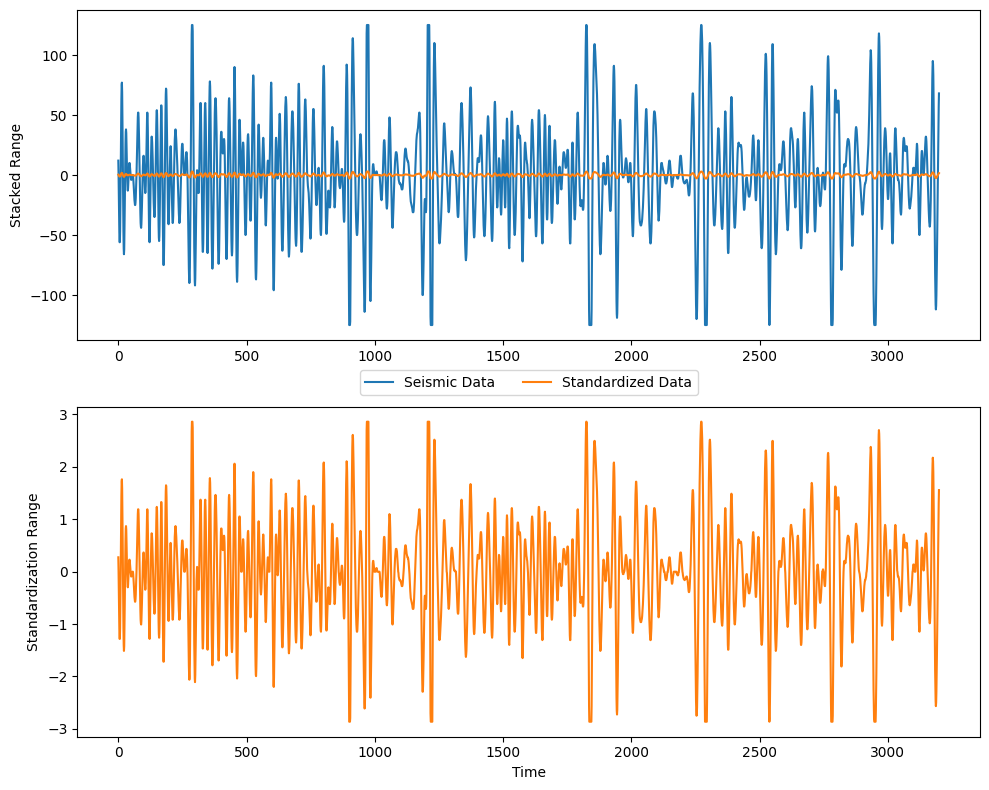

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from evaluate import Evaluate
evlt = Evaluate()


seisp = 'H:/LocalDisk/project/CuanDongBei/slice/seis/slice_data.datt'
ni, nx, nt = 1280, 512, 3200
sx = np.fromfile(seisp, np.float32).reshape(ni, nx, nt)
# 创建数据
# x = np.linspace(0, nt, num=nt+1)[:-1]
x = np.arange(nt)
y1 = sx[640, 256, :]
y2 = evlt.norm(y1)

# x = np.linspace(0, 2*np.pi, 100)
# y1 = np.sin(x)
# y2 = np.cos(x)

fig, axs = plt.subplots(2, figsize=(10, 8))

axs[0].set_ylabel('Stacked Range')
axs[1].set_ylabel('Standardization Range')
axs[1].set_xlabel('Time')

# 绘制曲线
axs[0].plot(x, y1, label='Seismic Data', color='#1f77b4')
axs[0].plot(x, y2, label='Standardized Data', color='#ff7f0e')

axs[1].plot(x, y2, label='Standardized Data', color='#ff7f0e')

# 添加图例
axs[0].legend(loc='upper center', bbox_to_anchor=(0.5, -0.07), shadow=False, ncol=2)


# 添加标题和坐标轴标签
# plt.title('Sine and Cosine Functions')
# plt.xlabel('Seismic Data')
# plt.ylabel('Y')
plt.tight_layout()

# 显示图形
plt.show()

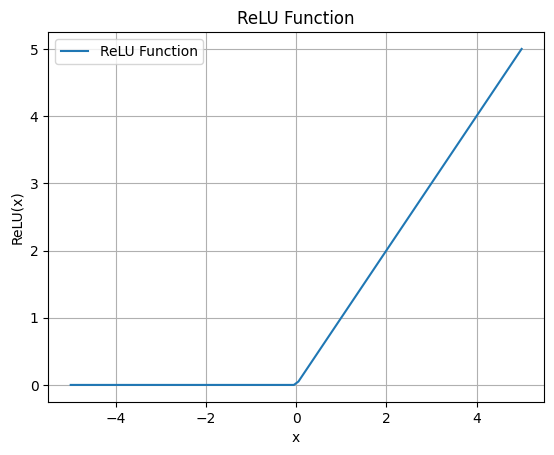

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# 定义 ReLU 函数
def relu(x):
    return np.maximum(0, x)

# 生成输入数据
x = np.linspace(-5, 5, 100)

# 计算 ReLU 函数的输出
y = relu(x)

# 绘制 ReLU 函数图像
plt.plot(x, y, label='ReLU Function')
plt.xlabel('x')
plt.ylabel('ReLU(x)')
plt.title('ReLU Function')
plt.grid(True)
plt.legend()
plt.show()


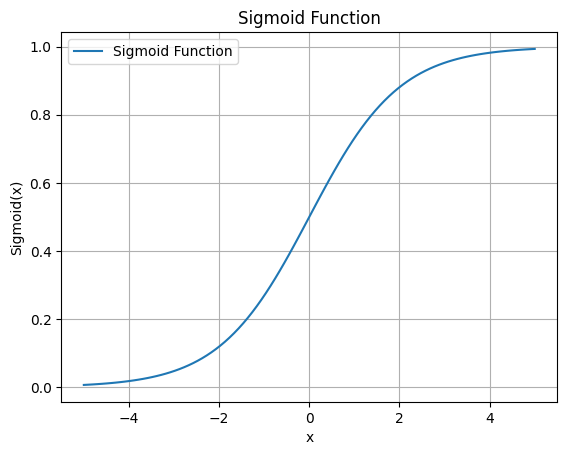

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# 定义 Sigmoid 函数
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# 生成输入数据
x = np.linspace(-5, 5, 100)

# 计算 Sigmoid 函数的输出
y = sigmoid(x)

# 绘制 Sigmoid 函数图像
plt.plot(x, y, label='Sigmoid Function')
plt.xlabel('x')
plt.ylabel('Sigmoid(x)')
plt.title('Sigmoid Function')
plt.grid(True)
plt.legend()
plt.show()


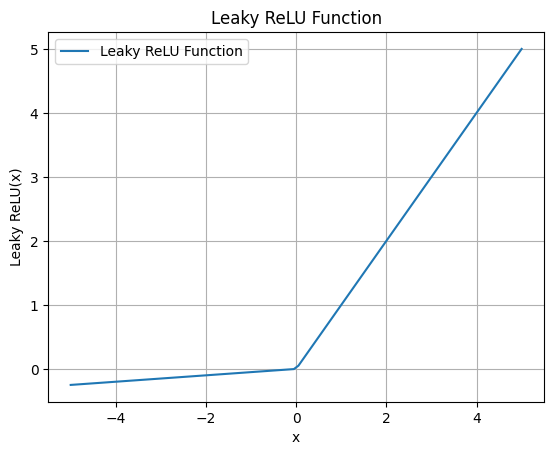

: 

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# 定义 Leaky ReLU 函数
def leaky_relu(x, alpha=0.05):
    return np.where(x > 0, x, alpha * x)

# 生成输入数据
x = np.linspace(-5, 5, 100)

# 计算 Leaky ReLU 函数的输出
y = leaky_relu(x)

# 绘制 Leaky ReLU 函数图像
plt.plot(x, y, label='Leaky ReLU Function')
plt.xlabel('x')
plt.ylabel('Leaky ReLU(x)')
plt.title('Leaky ReLU Function')
plt.grid(True)
plt.legend()
plt.show()


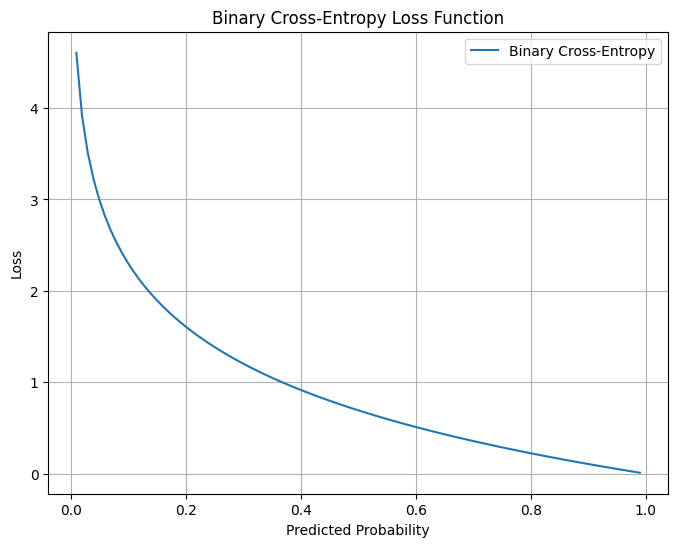

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# 定义二元交叉熵函数
def binary_cross_entropy(y, y_hat):
    return - (y * np.log(y_hat) + (1 - y) * np.log(1 - y_hat))

# 生成预测概率值范围
y_hat_range = np.linspace(0.01, 0.99, 100)

# 定义真实标签为1的情况
y_true = 1

# 计算二元交叉熵损失
bce_loss = binary_cross_entropy(y_true, y_hat_range)

# 绘制图像
plt.figure(figsize=(8, 6))
plt.plot(y_hat_range, bce_loss, label='Binary Cross-Entropy')
plt.title('Binary Cross-Entropy Loss Function')
plt.xlabel('Predicted Probability')
plt.ylabel('Loss')
plt.grid(True)
plt.legend()
plt.show()


# 读取数据

In [1]:
import pandas as pd
def csv_concat(root, path0, path1, name):

    # path0 = 'data/rate/leakyrelu/rate0/train_epoch_loss.csv'
    # path1 = 'data/rate/leakyrelu/rate1/train_epoch_loss.csv'
    
    path0 = root + path0 + name
    path1 = root + path1 + name

    # 读取CSV文件
    df0 = pd.read_csv(path0, header=None)
    df1 = pd.read_csv(path1, header=None)

    # 提取指定索引列数据（假设索引为 0）
    df0 = df0.iloc[:, 1]
    df1 = df1.iloc[:, 1]
    df = pd.concat([df0,df1],ignore_index=True)

    # 打印提取的数据
    # print(df)
    # df.to_csv('data/rate/leakyrelu/tra_epoch_loss.csv',index=False,header=False)
    df.to_csv(root+name, index=False, header=False)


In [5]:
root = 'data/rate/leakyrelu/'
path0, path1 = 'rate0/', 'rate1/'
name = 'tra_epoch_acc.csv'
csv_concat(root, path0, path1, name)
name = 'tra_epoch_loss.csv'
csv_concat(root, path0, path1, name)
name = 'tra_epoch_pr_auc.csv'
csv_concat(root, path0, path1, name)
name = 'tra_epoch_pre.csv'
csv_concat(root, path0, path1, name)
name = 'tra_epoch_rec.csv'
csv_concat(root, path0, path1, name)
name = 'tra_epoch_roc_auc.csv'
csv_concat(root, path0, path1, name)
name = 'val_epoch_acc.csv'
csv_concat(root, path0, path1, name)
name = 'val_epoch_los.csv'
csv_concat(root, path0, path1, name)
name = 'val_epoch_pr_auc.csv'
csv_concat(root, path0, path1, name)
name = 'val_epoch_pre.csv'
csv_concat(root, path0, path1, name)
name = 'val_epoch_rec.csv'
csv_concat(root, path0, path1, name)
name = 'val_epoch_roc_auc.csv'
csv_concat(root, path0, path1, name)

In [ ]:
import pandas as pd
def read_data(path):
    df = pd.read_csv(path, header=None)
    df = df.iloc[:,0]
    return df

In [15]:
root = 'data/rate/leakyrelu/'
tname, vname = 'tra_epoch_loss.csv', 'val_epoch_los.csv'
tlos, vlos = read_data(root+tname), read_data(root+vname)
tname, vname = 'tra_epoch_acc.csv', 'val_epoch_acc.csv'
tacc, vacc = read_data(root+tname), read_data(root+vname)
tname, vname = 'tra_epoch_pre.csv', 'val_epoch_pre.csv'
tpre, vpre = read_data(root+tname), read_data(root+vname)
tname, vname = 'tra_epoch_rec.csv', 'val_epoch_rec.csv'
trec, vrec = read_data(root+tname), read_data(root+vname)
tname, vname = 'tra_epoch_pr_auc.csv', 'val_epoch_pr_auc.csv'
tpra, vpra = read_data(root+tname), read_data(root+vname)
tname, vname = 'tra_epoch_roc_auc.csv', 'val_epoch_roc_auc.csv'
troa, vroa = read_data(root+tname), read_data(root+vname)

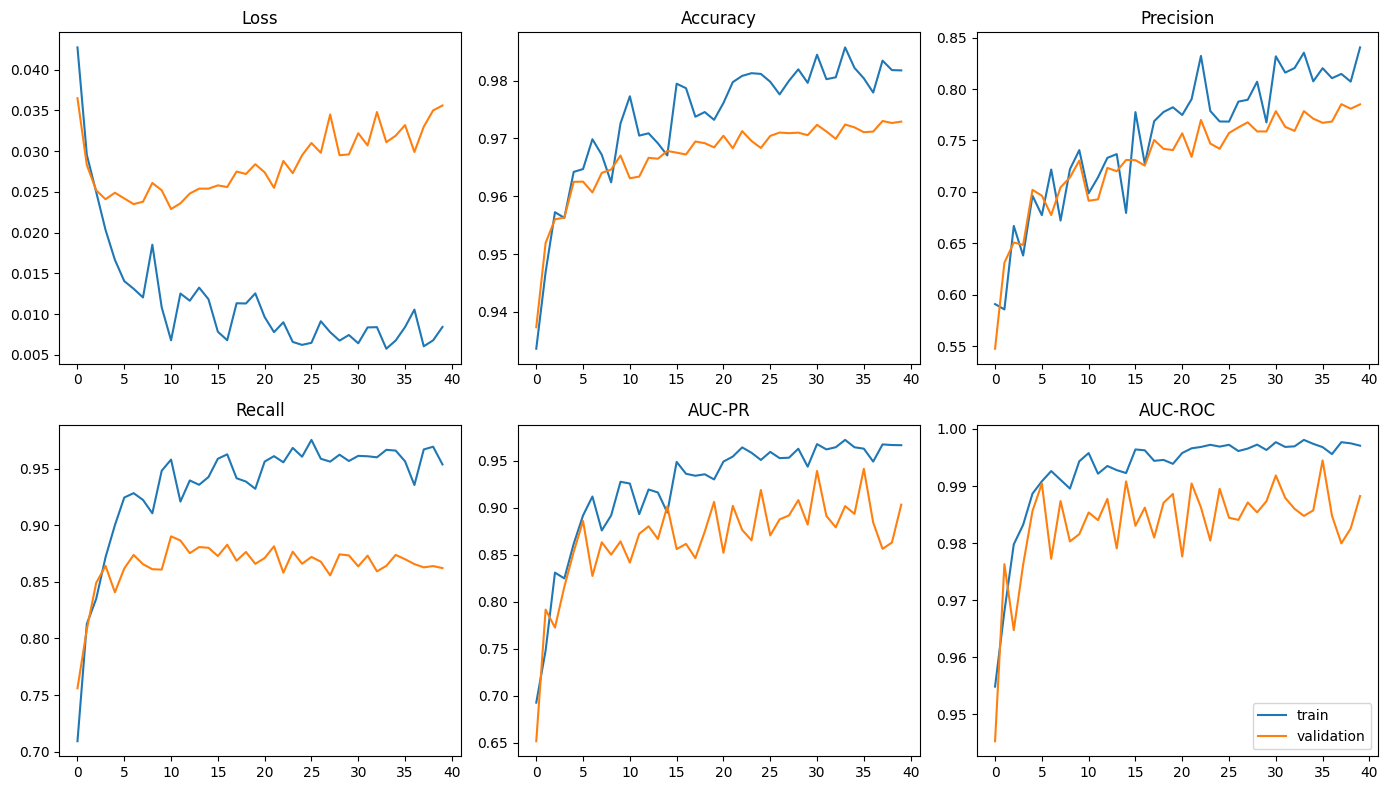

In [26]:
import matplotlib.pyplot as plt
import numpy as np

# 创建一个 2x3 的子图布局
fig, axes = plt.subplots(2, 3, figsize=(14, 8))

# 绘制第一个子图
axes[0, 0].plot(np.arange(len(tlos)), tlos, label='train')
axes[0, 0].plot(np.arange(len(vlos)), vlos, label='validation')
axes[0, 0].set_title('Loss')

# 绘制第二个子图
axes[0, 1].plot(np.arange(len(tacc)), tacc, label='train')
axes[0, 1].plot(np.arange(len(vacc)), vacc, label='validation')
axes[0, 1].set_title('Accuracy')

# 绘制第三个子图
axes[0, 2].plot(np.arange(len(tpre)), tpre, label='train')
axes[0, 2].plot(np.arange(len(vpre)), vpre, label='validation')
axes[0, 2].set_title('Precision')

# 绘制第四个子图
axes[1, 0].plot(np.arange(len(trec)), trec, label='train')
axes[1, 0].plot(np.arange(len(vrec)), vrec, label='validation')
axes[1, 0].set_title('Recall')

# 绘制第五个子图
axes[1, 1].plot(np.arange(len(tpra)), tpra, label='train')
axes[1, 1].plot(np.arange(len(vpra)), vpra, label='validation')
axes[1, 1].set_title('AUC-PR')

# 绘制第六个子图
axes[1, 2].plot(np.arange(len(troa)), troa, label='train')
axes[1, 2].plot(np.arange(len(vroa)), vroa, label='validation')
axes[1, 2].set_title('AUC-ROC')

# # 统一设置图例
# for ax in axes.flat:
#     ax.legend()
# 添加图例到最后一个子图，并设置位置
axes[-1, -1].legend(loc='lower right')
# 调整布局
plt.tight_layout()

# 显示图形
plt.show()
